In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import plotting

#plotly 
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,classification_report,precision_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf


plt.style.use('fivethirtyeight')

import warnings
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.



In [3]:
df=pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df=df.drop('Unnamed: 32', axis=1)


# Converting the categorical feature as into numerical
* Malign- 1
* Baning-0

In [5]:
diagnosis={'M':1, 'B':0}
df['diagnosis']=[diagnosis[x] for x in df['diagnosis']]

# Missing Value

In [6]:
k= pd.DataFrame()
k['df']= df.isnull().sum()
k.T

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
df,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Normality Test 
* use parametric or nonparametric statistical methods.
* Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution
* If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

# Normality Assumption
* A large fraction of the field of statistics is concerned with data that assumes that it was drawn from a Gaussian distribution.
* If methods are used that assume a Gaussian distribution, and your data was drawn from a different distribution, the findings may be misleading or plain wrong
If Data Is Gaussian:
* Use Parametric Statistical Methods
* Else:
* Use Nonparametric Statistical Methods

# Histogram
* the data is divided into a pre-specified number of groups called bins.


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='radius_mean', ylabel='Density'>

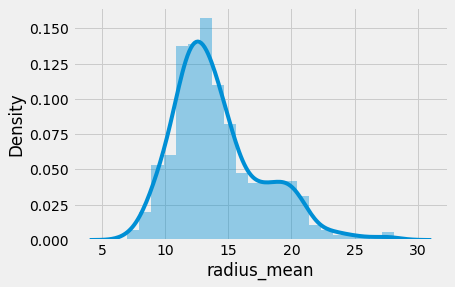

In [8]:
sns.distplot(df.radius_mean)

In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
col=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# Subplot

ValueError: num must be 1 <= num <= 30, not 31

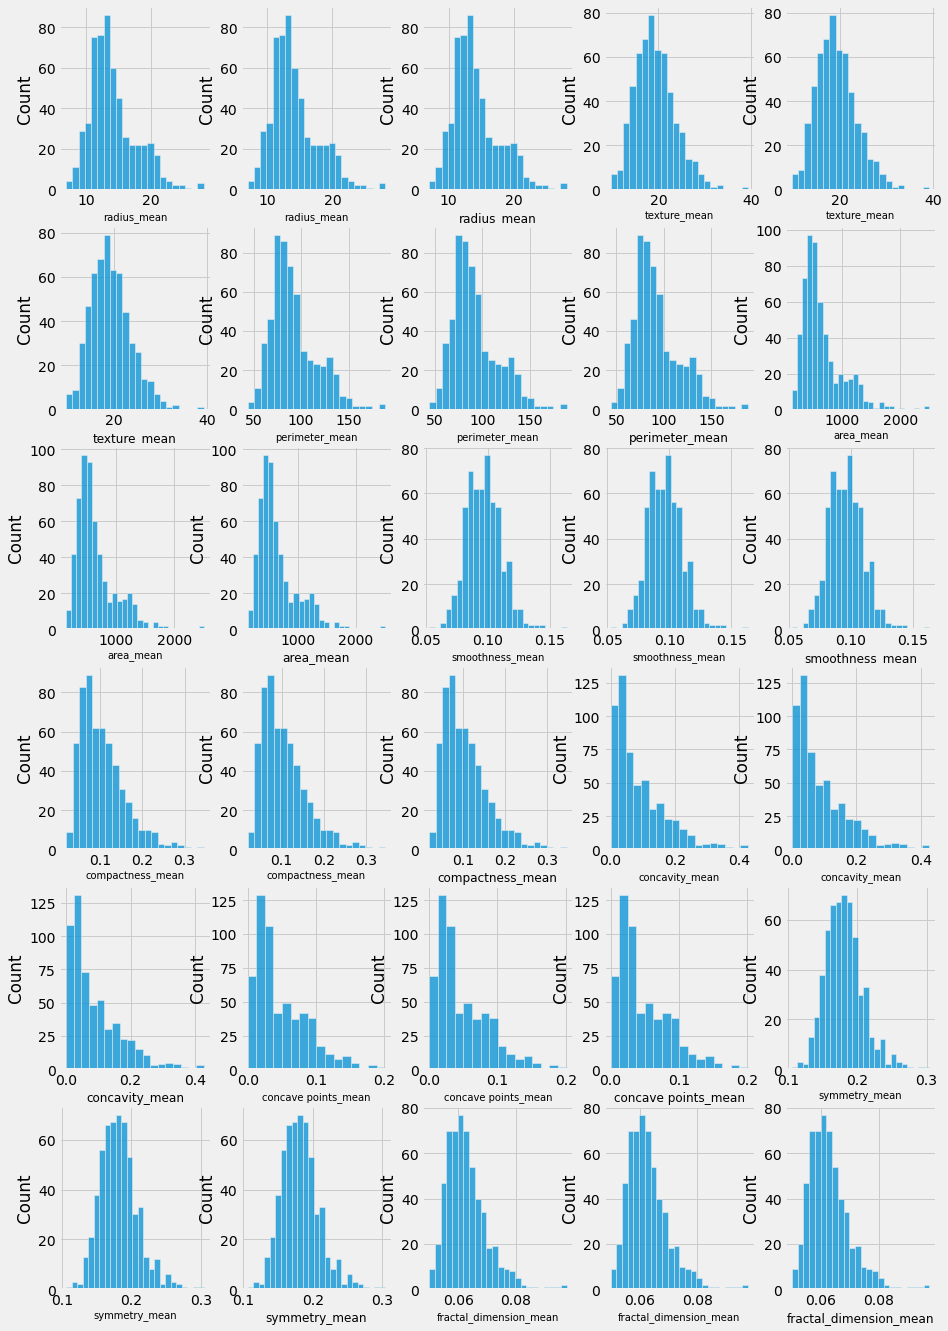

In [11]:

#  plot Numerical Data
a = 6  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))


for i in col:
    plt.subplot(a, b, c )
   # plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i, fontsize=10)
    sns.histplot(df[i])
    c = c + 1

    plt.subplot(a, b, c)
   # plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i, fontsize=10)
    sns.histplot( df[i])
    c = c + 1

    plt.subplot(a, b, c)
   # plt.title('{} (scatter), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i, fontsize=12)
    sns.histplot(df[i])
    c = c + 1

plt.show()

# Deviding the dataset 
* When Diagnosi is M=1
* b=0

In [ ]:
df.columns

# Slicing the Dataset:
* To separate your data into subgroups and look at the values of your metrics in those subgroups separately.
* To see the trends individual analysins

In [ ]:
df_m=df[df['diagnosis']==1]
df_b=df[df['diagnosis']==0]

# Shape of the each sliced dataset


In [ ]:
df_m.shape, df_b.shape

In [ ]:
#  plot Numerical Data
a = 6  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))


for i in col:
    plt.subplot(a, b, c )
   # plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i, fontsize=10)
    sns.histplot(df_m[i])
    c = c + 1

    plt.subplot(a, b, c)
   # plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i, fontsize=10)
    sns.histplot( df_m[i])
    c = c + 1

    plt.subplot(a, b, c)
   # plt.title('{} (scatter), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i, fontsize=12)
    sns.histplot(df_m[i])
    c = c + 1

plt.show()

In [ ]:
#  plot Numerical Data
a = 6  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))


for i in col:
    plt.subplot(a, b, c)
   # plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i, fontsize=10)
    sns.histplot(df_b[i])
    c = c + 1

    plt.subplot(a, b, c)
   # plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i, fontsize=10)
    sns.histplot( df_b[i])
    c = c + 1

    plt.subplot(a, b, c)
   # plt.title('{} (scatter), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i, fontsize=12)
    sns.histplot(df_b[i])
    c = c + 1

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,6))

plt.subplot(211)   #  subplot 1 - female
plt.title('Malignant.corr(),  subplot: 121')
sns.heatmap(df_m.corr(), annot=True, fmt='.2f', square=True, cmap = 'Reds_r')

plt.subplot(212)   #  subplot 2 - male
plt.title('Banign.corr(),  subplot: 122')
sns.heatmap(df_b.corr(), annot=True, fmt='.2f', square=True, cmap = 'Blues_r')

plt.show()

In [ ]:
plt.figure(figsize=(10, 15))
plt.subplot(3,1,1)
sns.histplot(df['radius_mean'])

plt.subplot(3,1,2)
sns.histplot(df_m['radius_mean'])

plt.subplot(3,1,3)
sns.histplot(df_b['radius_mean'])


In [ ]:
plt.figure(figsize=(10, 15))
plt.subplot(3,1,1)
sns.kdeplot(df['radius_mean'], fill=True)

plt.subplot(3,1,2)
sns.kdeplot(df_m['radius_mean'], fill=True)

plt.subplot(3,1,3)
sns.kdeplot(df_b['radius_mean'], fill=True)


In [ ]:
plt.figure(figsize=(10, 15))
plt.subplot(3,1,1)
sns.kdeplot(df['area_mean'], fill=True)

plt.subplot(3,1,2)
sns.kdeplot(df_m['area_mean'], fill=True)

plt.subplot(3,1,3)
sns.kdeplot(df_b['area_mean'], fill=True)

In [ ]:
for i in col:
    plt.figure(figsize=(10, 15))
    plt.subplot(3,3,1)
    sns.kdeplot(df[i], fill=True)

    plt.subplot(3,3,2)
    sns.kdeplot(df_m[i], fill=True)

    plt.subplot(3,3,3)
    sns.kdeplot(df_b[i], fill=True)

# Obs
* It is hard t find the Sampson's paradox
* We can see that most of the features follow Gaussian's Distribution
* Concavity Mean, Concave Point Mean, Radius  SE -- These features donot follow the gaussian Distribution 

# Q-Q plot
* Another popular plot for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short.
*  it is a technique to compare whether two sets of sample points are from or they follow same distributions.
* one distribution is know , we have to check for the other distribution
* If the unknown sample of dataset follow given distribution, we will have a scatter plot, where data points will be in a straight line y = x.
* he idea is to plot the quantile values of two distributions/samples and see
*  if they make a straight line or not. If the quantiles of two sample sets are similar or in a better case, identical then sample set is from the same distribution.
# The process of QQ plot 
* Arrange the datase in increasing order.
* Caculate the percentiles for each increasig dataset
* PLot those percentiles with the help of Scatter plot
* Done

# Let's plot Q-Q plot for these data points against the normal distribution

In [ ]:
import scipy.stats as stats
stats.probplot(df['radius_mean'], dist="norm", plot=plt)
plt.show()

In [ ]:
for i in col:
    
    stats.probplot(df[i], dist="norm", plot=plt)
    plt.title(i)
    plt.show()

# Obs
* As we can see that QQ plot gives an better idea that which distribution follow the Normality distribution 

# Shapiro-Wilk Test
* evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution
* he Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.
* The function returns both the W-statistic calculated by the test and the p-value.

In [ ]:
from scipy.stats import shapiro


In [ ]:
# normality test
stat, p = shapiro(df['radius_mean'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [ ]:
cor_df=pd.DataFrame(columns=['W','p-value'])
for col in df:
   # print(col)
    if pd.api.types.is_numeric_dtype(df[col]):
        w, p=shapiro(df[col])
        cor_df.loc[col]=[w, p]
cor_df

In [ ]:
alpha=0.05
cor_df["p-a"]=cor_df['p-value']-alpha

In [ ]:
for i in cor_df['p-value']:
    if i >alpha:
        print("Hypotheis is True")
    else:
        print("Hypotheis is not true")

# OBS
* It is observed that using this test
* none of the features follow gaussian distribution
* we use some other test 

# Performing the same test to the sliced dataset

In [ ]:
col=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
for i in col:
    stats.probplot(df_m[i], dist="norm", plot=plt)
    plt.title(i)
    plt.show()

In [ ]:
for i in col:
    stats.probplot(df_b[i], dist="norm", plot=plt)
    plt.title(i)
    plt.show()

# Obs
* As we have observed that we have seen that some of the features donot follow the Gaussian 
* Those features are Perimeter_se, smoothness_se, compatness_se, concavity, fractal_dimension_se, compactness_worst, fractal_dimension_worst

# Shapiro-Wilk Test

In [ ]:
cor_df_m=pd.DataFrame(columns=['W','p-value'])
for col in df_m:
   # print(col)
    if pd.api.types.is_numeric_dtype(df_m[col]):
        w, p=shapiro(df_m[col])
        cor_df_m.loc[col]=[w, p]
cor_df_m

In [ ]:
for i in cor_df_m['p-value']:
    if i >alpha:
        print("Hypotheis is True")
    else:
        print("Hypotheis is not true")
        

# Obs
* AS we can see that radius_mean and concave points_worst follow the gaussian distribution and rest donot

In [ ]:
cor_df_b=pd.DataFrame(columns=['W','p-value'])
for col in df_b:
   # print(col)
    if pd.api.types.is_numeric_dtype(df_b[col]):
        w, p=shapiro(df_b[col])
        cor_df_b.loc[col]=[w, p]
cor_df_b

In [ ]:
for i in cor_df_b['p-value']:
    if i >alpha:
        print("Hypotheis is True")
    else:
        print("Hypotheis is not true")

# Obs
* radius_mean, texture_mean, perimeter_mean, symmetry_worst, perimeter_worst, radius_worst --these features follow the Guassian Distributon.

In [ ]:
col=['radius_mean', 'texture_mean', 'perimeter_mean',
        'smoothness_mean', 
        'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se',
        'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
        'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

# Modelling 

In [ ]:
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

# Logistic Regresion

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
error_rate=[]
for s in solver:
    
    lr=LogisticRegression(solver=s)
    lr.fit(X_train, y_train)
    pred=lr.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
plt.figure(figsize=(15,10))
plt.plot(solver, error_rate,marker='o', markersize=9)

# Observation:
* Using the multiple solver we can see that "newton-cg" work good
* Error rate is very low for this

In [ ]:
lr=LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

In [ ]:
y_pred=lr.predict(X_train)

In [ ]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

In [ ]:
y_test_pred=lr.predict(x_test)

In [ ]:
lr_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",lr_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

# Obs
* Accuracy is quite high
* NO sign of overefitting
* Though the acuracy has increased mucher better, last time it was 0.93

In [ ]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=lr.classes_)
disp.plot()

# Observation
* Since it is a cancer dataset
* As we can see that True Negative and True Possitive are quite high
* Since False negative and false positive are quite zero which is good
* SInce one of the parameter in False Negative which is important parameters. It is zero and we can see that no patience cancer is wronly predicted to zero.
* Our model is working very fine


# Performing K-fold cross validation with Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score    
scores = cross_val_score(lr, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print("-------------------")
print(scores.mean())

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
y_test_pred_prob=lr.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

In [ ]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=lr.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
error_rate=[]

for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred=knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
    
plt.figure(figsize=(15,10))
plt.plot(range(1,11), error_rate,marker='o', markersize=9)

# Conclusion:-
As we can see that the optimum K in KNN we get is K=6.

In [ ]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

In [ ]:
y_pred=knn.predict(X_train)


In [ ]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

# Conclusion:
* As we can see that in my previsous notebook the accuracy was 87.43%, while in this case the accuracy is 74%.
* It is observed that removing the two feature help ub increasing the accuracy of the dataset using KNN model as prediction
* Log Loss is increased as it was 4.33 and now it is 8.67
* ROC-AUC is decreased , now it is 0.6805 , which is no improvement of previous results in last notbook

In [ ]:
y_test_pred=knn.predict(x_test)


In [ ]:
knn_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",knn_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

In [ ]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=knn.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
y_test_pred_prob=knn.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

In [ ]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title

In [ ]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=knn.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Knn")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# Simple Cross validation

In [ ]:
# train, cv, test
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)
X_tr, X_cv, y_tr, y_cv = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.metrics import accuracy_score
hist = {
    'ks': [],
    'acc_cv': [],
    'acc_tr': []
}

for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    # fitting cv train
    knn.fit(X_tr, y_tr)
    # predict and eval  cv train
    pred_cv = knn.predict(X_cv)
    pred_tr = knn.predict(X_tr)
    acc_cv = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
    acc_tr  = accuracy_score(y_tr, pred_tr, normalize=True) * float(100)
    print(f"k:{k}\t val-acc: {acc_cv} \ttrain-acc: {acc_tr}")
    
    # log
    hist['ks'].append(k)    
    hist['acc_cv'].append(acc_cv)    
    hist['acc_tr'].append(acc_tr)

In [ ]:
plt.figure(figsize=(20, 7))

plt.plot(hist['ks'], hist['acc_cv'], label='cv')
plt.plot(hist['ks'], hist['acc_tr'], label='train')

for k, acc_cv in zip(hist['ks'], hist['acc_cv']):
    plt.text(k, acc_cv, f'k={k}')

plt.legend()
plt.show()

# k=35 looks good

In [ ]:
k = 35

knn = KNeighborsClassifier(n_neighbors=k)
# fitting cv train
knn.fit(X_tr, y_tr)
# predict and eval  cv train
pred_cv = knn.predict(X_cv)
acc_cv = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
print(f"k:{k}\t val-acc: {acc_cv}")

* Accuracy is very low hence it can not be used

# SVC -Support Vector Classifier


In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
svc=SVC(kernel='poly', C=1.0) #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_train)

In [ ]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

In [ ]:
y_test_pred=svc.predict(X_test)


In [ ]:
svc_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",svc_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

In [ ]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=svc.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
y_test_pred_prob=lr.predict_proba(X_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

In [ ]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=knn.predict_proba(X_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="SVC")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# Decision Tree Clasifiers

In [ ]:
col=['radius_mean', 'texture_mean', 'perimeter_mean',
        'smoothness_mean', 
        'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se',
        'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
        'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

In [ ]:
y_pred_gini = clf_gini.predict(X_train)


In [ ]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred_gini))
print("F1 Score:-", metrics.f1_score(y_train, y_pred_gini))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred_gini))
print("Log Loss:-", metrics.log_loss(y_train, y_pred_gini))
print("Precision Score:-", metrics.precision_score(y_train, y_pred_gini))
print("Recall Score:-", metrics.recall_score(y_train, y_pred_gini))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred_gini))

In [ ]:
y_test_pred= clf_gini.predict(x_test)


In [ ]:
dc_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",dc_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

In [ ]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=clf_gini.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
y_test_pred_prob=clf_gini.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

In [ ]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=lr.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Decision Tree")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# Visualize decision-trees

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# Decision Tree Classifier with criterion entropy

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

In [ ]:
error_rate=[]
for i in range(1,11):
    clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)


    # fit the model
    clf_en.fit(X_train, y_train)
    pred=clf_en.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
    
plt.figure(figsize=(15,10))
plt.plot(range(1,11), error_rate,marker='o', markersize=9)

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

In [ ]:
y_pred=clf_en.predict(X_train)

In [ ]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

In [ ]:
y_test_pred=clf_en.predict(x_test)


In [ ]:
dc_en_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",dc_en_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

In [ ]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=clf_en.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
y_test_pred_prob=clf_gini.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

In [ ]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='DEcision Tree with Entropy')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

# Standarizd dataset will be modeled

In [ ]:
col=['radius_mean', 'texture_mean', 'perimeter_mean',
        'smoothness_mean', 
        'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se',
        'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
        'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

# Logistic Regresion

In [ ]:
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
error_rate=[]
for s in solver:
    
    lr=LogisticRegression(solver=s)
    lr.fit(X_train, y_train)
    pred=lr.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
plt.figure(figsize=(15,10))
plt.plot(solver, error_rate,marker='o', markersize=9)

In [ ]:
lr=LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

In [ ]:
y_pred=lr.predict(X_train)


In [ ]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

# Conclusion
* Standardarization of the dataset affects the model and its accuracy

In [ ]:
y_test_pred=lr.predict(x_test)


In [ ]:
lr_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",lr_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

In [ ]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=lr.classes_)
disp.plot()

# Performing K-fold cross validation with Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score    
scores = cross_val_score(lr, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print("-------------------")
print(scores.mean())

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
y_test_pred_prob=lr.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

In [ ]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title("ROC_AUC")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=lr.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# K-NN

In [ ]:
error_rate=[]

for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred=knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
    
plt.figure(figsize=(15,10))
plt.plot(range(1,11), error_rate,marker='o', markersize=9)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

In [ ]:
y_pred=knn.predict(X_train)


In [ ]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

# Conclusion:
* Accuracy has increased too much
* Standarization affects the accuracy of the model
* Log-loss is almost zero
* Recall score and AUC are much better 

In [ ]:
y_test_pred=knn.predict(x_test)


In [ ]:
knn_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",knn_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

In [ ]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=knn.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
y_test_pred_prob=knn.predict_proba(x_test)[:,1]
y_test_pred_prob

from sklearn.metrics import roc_curve
metrics.roc_auc_score(y_test, y_test_pred_prob)

In [ ]:
fpr, tpr,thresholds=roc_curve(y_test,y_test_pred_prob)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("fpr (False Possitive rate)")
plt.ylabel("tpr-(True Positive rate)")
plt.title

In [ ]:
from sklearn.metrics import precision_recall_curve
no_skill=len(y==1)/len(y)
y_test_prob=knn.predict_proba(x_test)[:,1]
plt.figure(figsize=(10,8))
plt.plot([0,1],[no_skill, no_skill], label="No Skill")
precision, recall,_ =precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='',label="Knn")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")
plt.legend()
plt.show()

# Simple Cross validation

In [ ]:
# train, cv, test
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)
X_tr, X_cv, y_tr, y_cv = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.metrics import accuracy_score
hist = {
    'ks': [],
    'acc_cv': [],
    'acc_tr': []
}

for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    # fitting cv train
    knn.fit(X_tr, y_tr)
    # predict and eval  cv train
    pred_cv = knn.predict(X_cv)
    pred_tr = knn.predict(X_tr)
    acc_cv = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
    acc_tr  = accuracy_score(y_tr, pred_tr, normalize=True) * float(100)
    print(f"k:{k}\t val-acc: {acc_cv} \ttrain-acc: {acc_tr}")
    
    # log
    hist['ks'].append(k)    
    hist['acc_cv'].append(acc_cv)    
    hist['acc_tr'].append(acc_tr)

In [ ]:
plt.figure(figsize=(20, 7))

plt.plot(hist['ks'], hist['acc_cv'], label='cv')
plt.plot(hist['ks'], hist['acc_tr'], label='train')

for k, acc_cv in zip(hist['ks'], hist['acc_cv']):
    plt.text(k, acc_cv, f'k={k}')

plt.legend()
plt.show()